In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('/Users/vaibhavvij/Documents/Grab Assignment/Grab_DS_Challenge/Data Science Challenge.csv')

In [41]:
df.info()
# No NULL values, Great!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

## Exploratory Analysis

In [42]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Text(0.5, 1.0, 'Distribution of churn data')

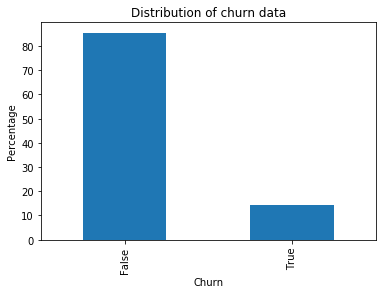

In [5]:
dist = df['churn'].value_counts() / df['churn'].count() * 100
ax = dist.plot('bar')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of churn data')

**Imbalaced Dataset - there are less data points in 'True' churn category**

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Mean and median values are almost same for all quantitative variables. This is a good indication on spread of data.**

In [7]:
intl_plan_perc = []
intl_plan_idx = []
for ipl in list(df['international plan'].unique()):    
    p = round((df['churn'][df['international plan'] == ipl].value_counts()[1]/df['churn'][df['international plan'] == ipl].count())*100, 2)
    intl_plan_perc.append(p)
    intl_plan_idx.append(ipl)

Text(0.5, 1.0, 'Churn Percentage by International plan')

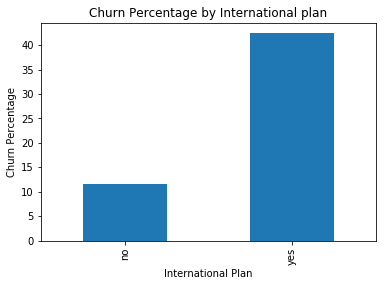

In [8]:
s = pd.Series(np.array(intl_plan_perc), index=intl_plan_idx)
ax = s.plot('bar')
ax.set_xlabel('International Plan')
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage by International plan')

**There is big difference in churn percentage based on whether customers had an international
plan or not. This is definitely a good feature for the model**

In [9]:
vm_plan_perc = []
vm_plan_idx = []
for vm in list(df['voice mail plan'].unique()):    
    p = round((df['churn'][df['voice mail plan'] == vm].value_counts()[1]/df['churn'][df['voice mail plan'] == vm].count())*100, 2)
    vm_plan_perc.append(p)
    vm_plan_idx.append(vm)

Text(0.5, 1.0, 'Churn Percentage by Voice Mail plan')

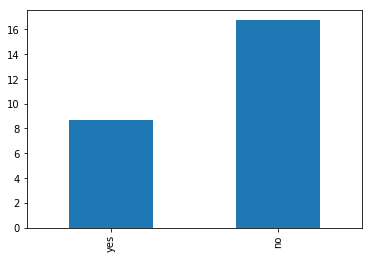

In [10]:
s_vm = pd.Series(np.array(vm_plan_perc), index=vm_plan_idx)
s_vm.plot('bar')
ax.set_xlabel('Voice Mail Plan')
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage by Voice Mail plan')

**Churn percentage is almost double for people with no voice mail plan. This also could be a
good candidate for model**

In [11]:
ac_perc = []
ac_idx = []
for ac in list(df['area code'].unique()):    
    p = round((df['churn'][df['area code'] == ac].value_counts()[1]/df['churn'][df['area code'] == ac].count())*100, 2)
    ac_perc.append(p)
    ac_idx.append(ac)

Text(0.5, 1.0, 'Churn Percentage by Area code')

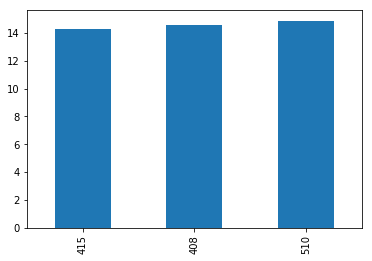

In [12]:
s_ac = pd.Series(np.array(ac_perc), index=ac_idx)
s_ac.plot('bar')
ax.set_xlabel('Area Code')
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage by Area code')

**Churn percentage doesn't differ much by area code. I will remove this later from the feature set**

In [13]:
st_perc = []
st_idx = []
for st in list(df['state'].unique()):    
    p = round((df['churn'][df['state'] == st].value_counts()[1]/df['churn'][df['state'] == st].count())*100, 2)
    st_perc.append(p)
    st_idx.append(st)

Text(0.5, 1.0, 'Churn Percentage by State')

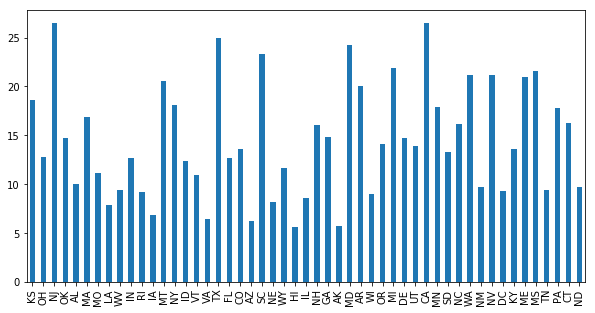

In [14]:
s_st = pd.Series(np.array(st_perc), index=st_idx)
s_st.plot('bar', figsize=(10,5))
ax.set_xlabel('State')
ax.set_ylabel('Churn Percentage')
ax.set_title('Churn Percentage by State')

**Churn percentage also varies signifantly from state to state. Let's keep it in the feature set**

Text(0.5, 1.0, 'Churn distribution by number of customer service calls')

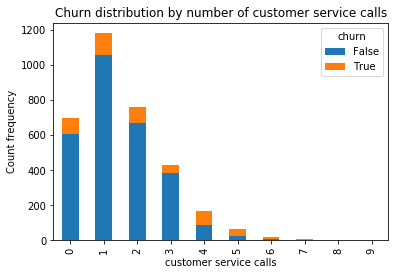

In [15]:
ax = df.groupby(['customer service calls', 'churn']).size().unstack().plot(kind='bar', stacked=True)
ax.set_ylabel('Count frequency')
ax.set_title('Churn distribution by number of customer service calls')

**Based on above plot distribution of churn also varies with the number of customer service calls made. This will also go as one of the variables in training the model**

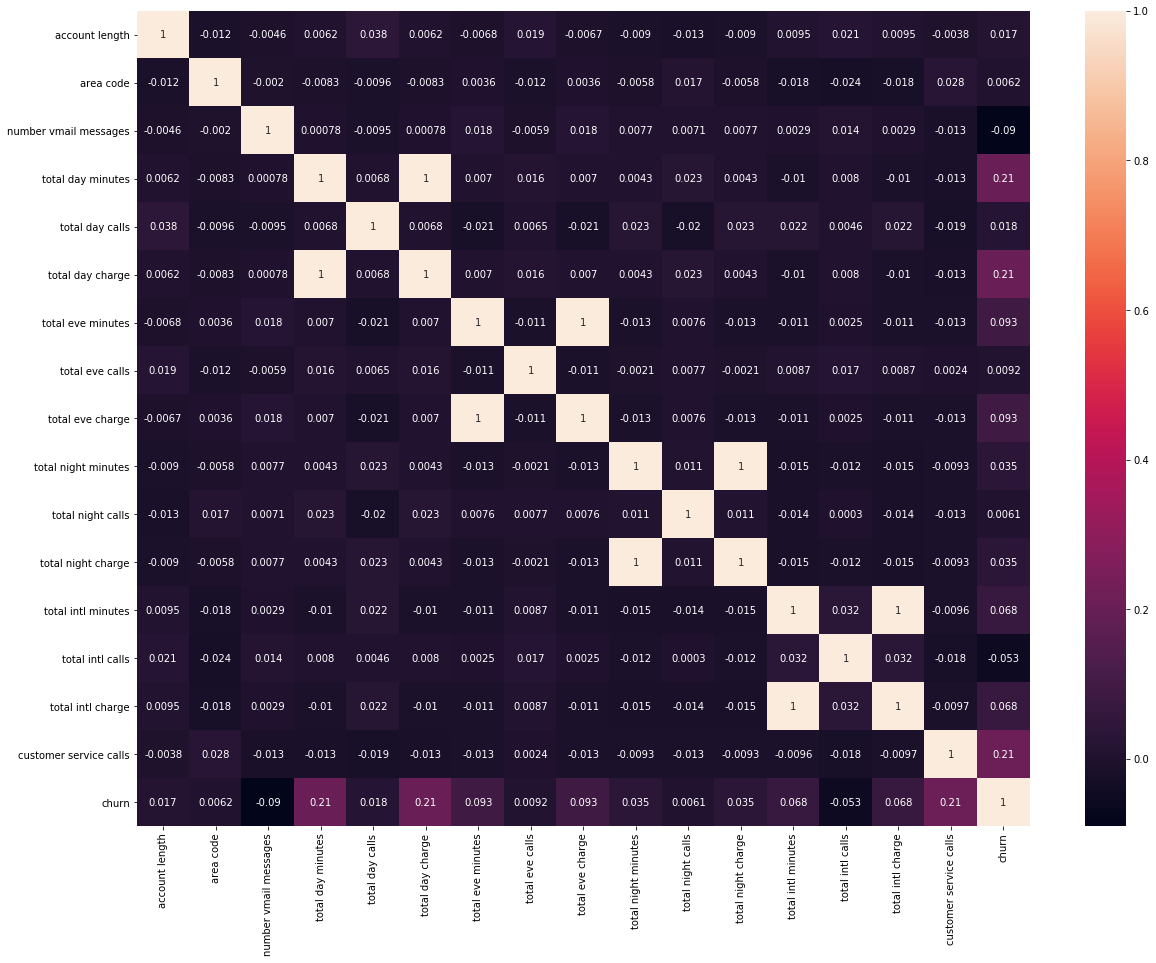

In [16]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Plot above depicts correlation between the variables. Let's try to avoid those explanotory variables that are strongly corelated. It can be seen from the plot that total day/eve/night minutes are strong corelated to total day/eve/night charges. Let's drop the minutes variables.**

## Data Preparation

In [3]:
cols_to_drop = ['area code', 'phone number', 'total day minutes', 
                'total eve minutes', 'total night minutes', 'total intl minutes']
df = df.drop(cols_to_drop, axis=1)

**Also dropped 'phone number' as it is not significant to model training**

In [4]:
df['international plan'].replace(['yes', 'no'], [1, 0], inplace=True)
df['voice mail plan'].replace(['yes', 'no'], [1, 0], inplace=True)
df['churn'].replace([True, False], [1, 0], inplace=True)

**Replacing categorical values of 'yes' and 'no' with 1 and 0 for international and voice mail plans. Also replaced boolean churn values with 1s and 0s**

In [5]:
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
state                     3333 non-null object
account length            3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
churn                     3333 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 390.7+ KB


**State is the only remaining categorical variable, thus creating a dummy variable column for each state using get_dummies**

In [7]:
df = pd.get_dummies(df)

In [8]:
label = df['churn']
features = df.drop(columns=['churn'], axis=1)

In [9]:
features.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,25,110,45.07,99,16.78,91,11.01,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,123,27.47,103,16.62,103,11.45,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,114,41.38,110,10.30,104,7.32,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,113,28.34,122,12.61,121,8.41,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**I have done a 70-30 split of data for training and testing. I have also normalized numerical values**

## Modelling

### Logistic Regression
Let's perform logistic regression first as it provides are good benchmark to evaluate other sophisticated models.

In [11]:
logisticRgr = LogisticRegression()
logisticRgr.fit(X=X_train, y=y_train)

/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_test_predict = logisticRgr.predict(X_test)

In [13]:
lg_confusion_matrix = confusion_matrix(y_test, y_test_predict)

In [14]:
print('Intercept: ' + str(logisticRgr.intercept_))
print('Regression: ' + str(logisticRgr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRgr.score(X_test, y_test)))
print(classification_report(y_test, y_test_predict))

Intercept: [-2.4052647]
Regression: [[ 0.07638754  0.68431925 -0.86888046  0.4825226   0.08557235  0.62731714
   0.03051953  0.34170637 -0.01462607  0.22929635 -0.18282436  0.22738844
   0.75902688 -0.0452223  -0.09601676  0.036417   -0.02256305  0.07356616
  -0.02176195  0.01507297  0.01691426 -0.03460824 -0.0470442  -0.07327152
  -0.2026368  -0.04249156 -0.00466392 -0.11313166 -0.00513585  0.02477521
  -0.00422779 -0.03467504  0.03110464  0.04264723  0.05454113  0.05859989
   0.09779549 -0.05269575  0.13895146  0.15962419 -0.07277213 -0.14373884
  -0.03794038  0.05492721  0.13100024 -0.06045898  0.08618055  0.04985781
  -0.06636813 -0.03271156  0.05572824  0.09107613 -0.06572125  0.10983989
   0.06185941 -0.00685357  0.13922422  0.01627235 -0.16362177 -0.07675553
   0.0967951  -0.04915409 -0.03015959 -0.06553686]]
Accuracy of logistic regression classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       858
  

Text(0.5, 1.0, 'Confusion Matrix - Logistic Reg')

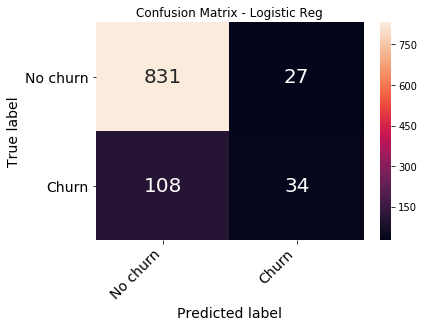

In [26]:
confusion_matrix_df = pd.DataFrame(lg_confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.title('Confusion Matrix - Logistic Reg')

**Observations**
- We got 85% accuracy from logistic regression
- False negatives are quite high. Moreover, precision and recall for positive class is quite low
- Above points indicate that the dataset could be imbalaced as we saw in the begining. It could induce risk that the trained model will predict in favour of majority (no-churn) class

## Logistic Regression with Upsampling
One of the ways to deal with imbalanced data is to upsample the minority class. Let's give it a try.

In [16]:
data_major = df[df['churn'] == 0]
data_minor = df[df['churn'] == 1]

In [17]:
data_minor_upsampled = resample(data_minor, replace=True, n_samples=2850, random_state=1)

**Creating same number (2850) datapoints for no-churn class**

In [18]:
data_upsampled = pd.concat([data_major, data_minor_upsampled])
data_upsampled['churn'].value_counts()

1    2850
0    2850
Name: churn, dtype: int64

In [19]:
label_ups = data_upsampled['churn']
features_ups = data_upsampled.drop(columns=['churn'], axis=1)

In [20]:
X_train_ups, X_test_ups, y_train_ups, y_test_ups = train_test_split(features_ups, label_ups, test_size=0.3)
sc_x = StandardScaler()
X_train_ups = sc_x.fit_transform(X_train_ups)
X_test_ups = sc_x.fit_transform(X_test_ups)

/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
logisticRgrUps = LogisticRegression()
logisticRgrUps.fit(X=X_train_ups, y=y_train_ups)
y_test_predict_ups = logisticRgrUps.predict(X_test_ups)

/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRgrUps.score(X_test_ups, y_test_ups)))
print(classification_report(y_test_ups, y_test_predict_ups))

Accuracy of logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       850
           1       0.77      0.78      0.78       860

   micro avg       0.77      0.77      0.77      1710
   macro avg       0.77      0.77      0.77      1710
weighted avg       0.77      0.77      0.77      1710



In [24]:
lg_up_confusion_matrix = confusion_matrix(y_test_ups, y_test_predict_ups)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Reg (Upsampled)')

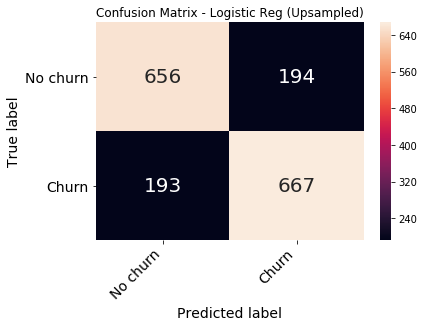

In [25]:
confusion_matrix_lg_up_df = pd.DataFrame(lg_up_confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_lg_up_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.title('Confusion Matrix - Logistic Reg (Upsampled)')

**Observations**
- Accuracy reduced to 76% after up-sampling
- Precision & recall to predict churn improved

### Tree based algorithms are better when dealing with imbalanced datasets. Let's try them.

### Random Forest

In [27]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

/Users/vaibhavvij/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
rfc_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)

Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

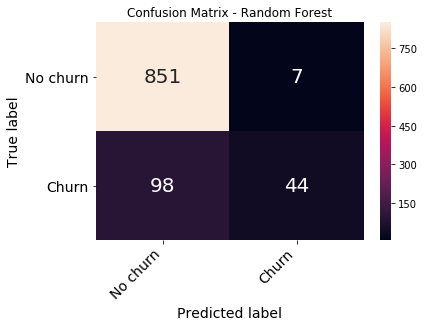

In [29]:
confusion_matrix_rfc_df = pd.DataFrame(rfc_confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_rfc_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.title('Confusion Matrix - Random Forest')

In [30]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(random_forest_classifier.score(X_test, y_test)))
print(classification_report(y_test, y_pred_rfc))

Accuracy of random forest classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       858
           1       0.86      0.31      0.46       142

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.88      0.65      0.70      1000
weighted avg       0.89      0.90      0.87      1000



In [31]:
cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_rfc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  91.68 %


**Cross Validation is important as the model accuracy could have high variance. That means if we re-split and run predictions again we may get different results. Here a cross validation accuracy of 90.6% is satisfactory**

In [32]:
y_pred_prob_rfc = random_forest_classifier.predict_proba(X_test)

In [33]:
y_pred_prob_rfc_churn = [p[1] for p in y_pred_prob_rfc]

In [34]:
rfc_auc = roc_auc_score(y_test, y_pred_prob_rfc_churn)

In [35]:
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, y_pred_prob_rfc_churn)

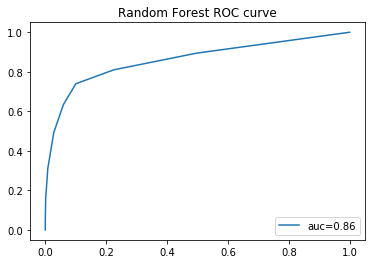

In [37]:
plt.plot(rfc_fpr, rfc_tpr, label="auc="+str(round(rfc_auc,2)))
plt.legend(loc=4)
plt.title('Random Forest ROC curve')
plt.show()

**Steps above do AUROC analysis for Random Forest. 89% AUC is good indicator of model performance**

**Observations**
- Random Forest gave 91% accuracy
- High precision & recall overall except low recall for predicting churn
- Better in dealing with false negatives
- Did good on cross validation and good 89% AUROC

### Gradient Boosting

In [38]:
gbdt_classifier = GradientBoostingClassifier()
gbdt_classifier.fit(X_train,y_train)
y_pred_gbdt = gbdt_classifier.predict(X_test)

In [39]:
gbdt_confusion_matrix = confusion_matrix(y_test, y_pred_gbdt)

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting')

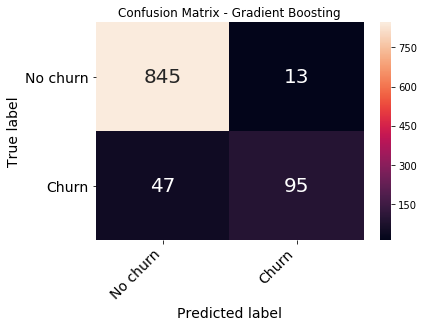

In [40]:
confusion_matrix_gbdt_df = pd.DataFrame(gbdt_confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_gbdt_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.title('Confusion Matrix - Gradient Boosting')

In [41]:
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(gbdt_classifier.score(X_test, y_test)))
print(classification_report(y_test, y_pred_gbdt))

Accuracy of gradient boosting classifier on test set: 0.94
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       858
           1       0.88      0.67      0.76       142

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [42]:
cross_val_gbdt = cross_val_score(estimator=GradientBoostingClassifier(), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_gbdt.mean() * 100 , 2),"%")

Cross Validation Accuracy :  95.03 %


In [43]:
y_pred_gbdt_prob = gbdt_classifier.predict_proba(X_test)

In [44]:
y_pred_gbdt_prob_churn = [p[1] for p in y_pred_gbdt_prob]

In [45]:
gbdt_auc = roc_auc_score(y_test, y_pred_gbdt_prob_churn)

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_pred_gbdt_prob_churn)

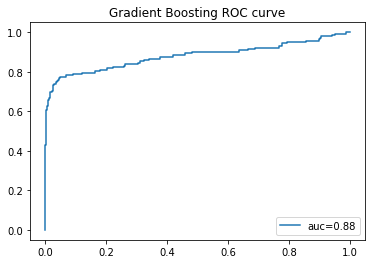

In [47]:
plt.plot(fpr,tpr,label="auc="+str(round(gbdt_auc,2)))
plt.legend(loc=4)
plt.title('Gradient Boosting ROC curve')
plt.show()

**Observations**
- Gradient Boosting has the best accuracy of 94%
- Best precision & recall among the other models
- Cross validation has a high accuracy of 95.4%
- 92% AUROC

**Gradient Boosting has performed very well and is my algorithm choice in this case. Let's look at the feature importances for the model.**

Text(0, 0.5, 'Feature')

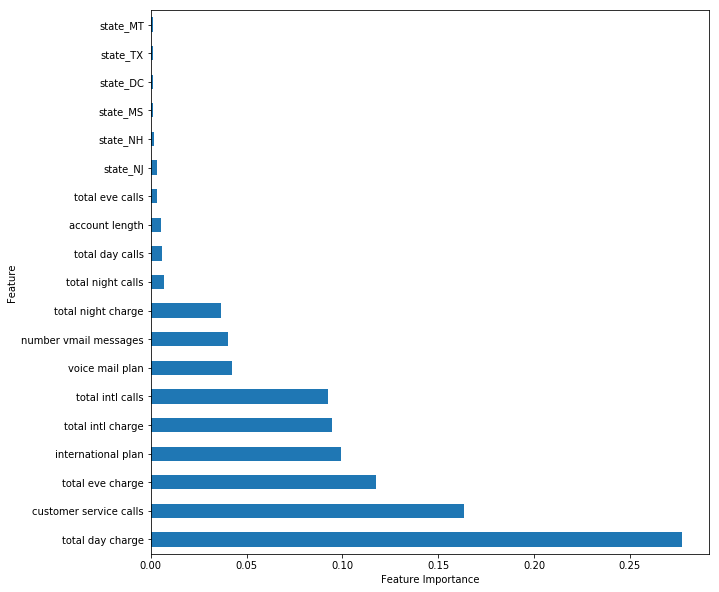

In [48]:
feature_importance = gbdt_classifier.feature_importances_
feat_importances = pd.Series(feature_importance, index=features.columns)
feat_importances = feat_importances.nlargest(19)
ax = feat_importances.plot(kind='barh' , figsize=(10,10))
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')